# Decision Tree Assignment

*Prafful Agrawal*  
*11/02/2021*

### Problem Statement

Build a classification model using decision trees to make predictions about the survival of a passenger from the **titanic dataset**.

### Solution

Let us import the required packages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus

Now, load the *Titanic Data* as a Pandas Dataframe.

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The description of the variables is given below:

| Variable      | Description                                                               |
| ------------: | :------------------------------------------------------------------------ |
| `PassengerId` | Passenger ID                                                              |
| `Survived`    | If survived; *0* = No, *1* = Yes                                          |
| `Pclass`      | Ticket class; *1* = 1st or Upper, *2* = 2nd or Middle, *3* = 3rd or Lower |
| `Name`        | Name of the passenger                                                     |
| `Sex`         | Sex of the passenger; whether *male* or *female*                          |
| `Age`         | Age of the passenger                                                      |
| `SibSp`       | Number of siblings / spouses aboard the Titanic                           |
| `Parch`       | Number of parents / children aboard the Titanic                           |
| `Ticket`      | Ticket number                                                             |
| `Fare`        | Passenger fare                                                            |
| `Cabin`       | Cabin number                                                              |
| `Embarked`    | Port of embarkation; *C* = Cherbourg, *Q* = Queenstown, *S* = Southampton |

Out of these, the variables `PassengerId`, `Name`, `Ticket`, `Cabin` and `Embarked` are not helpful for the classification and hence, will be dropped.

In [3]:
data = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Now, we will map the values of the `Sex` variable as follows:

In [4]:
data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The details regarding the data is given below:

In [5]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


The minimum value of `Fare` is equal to Zero. This should not be the case and could be due to an error. Therefore, we will drop the entries with `Fare` equal to Zero.

In [6]:
data = data[data['Fare'] != 0]
# Shape of the remaining data
data.shape

(876, 7)

Let us check for missing values.

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
dtype: int64

There are missing values in the `Age` variable.

We will replace the missing values with the median value of the variable.

In [8]:
data['Age'] = data['Age'].replace(np.nan, data['Age'].median())
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


Now, let us look at the distribution of data:

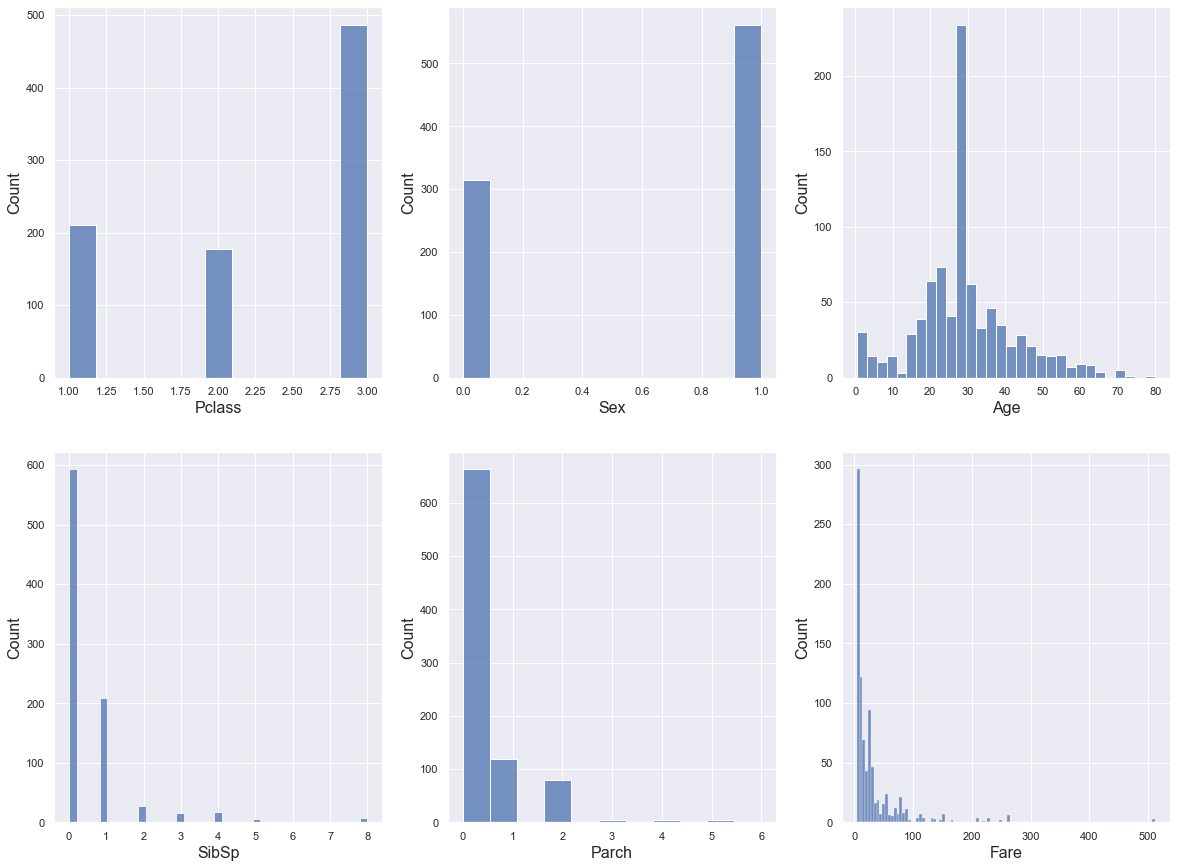

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in data.columns[1:]:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data = data[column], stat = 'count')
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

Multiple variables show considerable skewness. We can transform these to reduce their skewness.

We will replace the variables `Age` and `Fare` with their *logarithms*. While, for the variables `SibSp` and `Parch`, we will use *square roots* (since it has values equal to Zero).

In [10]:
data_trans = data.copy()
data_trans[['Age', 'Fare']] = np.log(data[['Age', 'Fare']])
data_trans[['SibSp', 'Parch']] = np.sqrt(data[['SibSp', 'Parch']])
data_trans.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,3.091042,1.0,0.0,1.981001
1,1,1,0,3.637586,1.0,0.0,4.266662
2,1,3,0,3.258097,0.0,0.0,2.070022
3,1,1,0,3.555348,1.0,0.0,3.972177
4,0,3,1,3.555348,0.0,0.0,2.085672


Again, look at the distribution of the transformed variables.

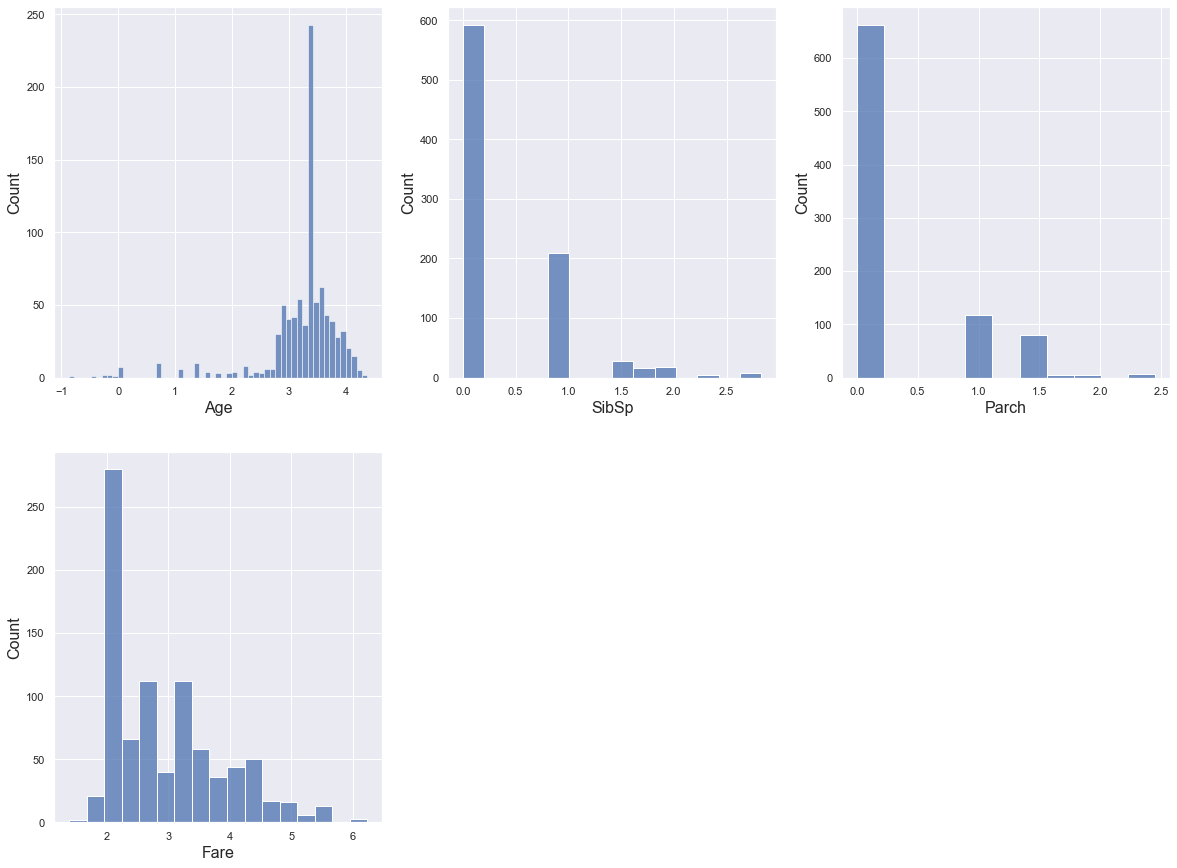

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in ['Age', 'SibSp', 'Parch', 'Fare']:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data = data_trans[column], stat = 'count')
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

There are some improvements but we still observe trailing edges. This may be the result of outliers.

Let us check for outliers in our data using boxplots.

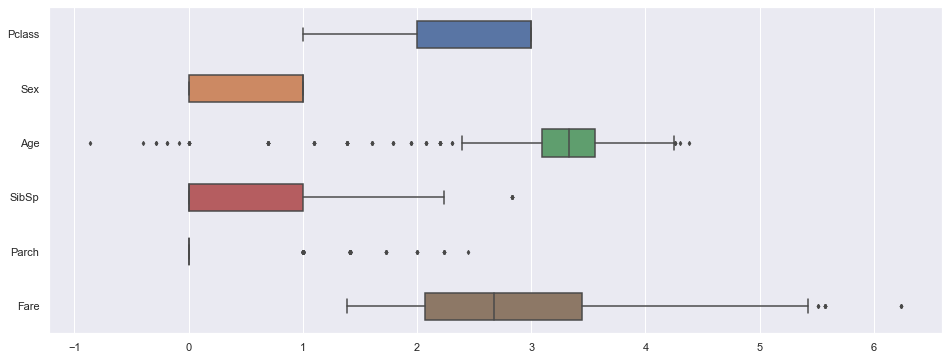

In [12]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = data_trans.drop(columns = 'Survived'), width = 0.5, orient = 'h', fliersize = 3)
plt.show()

Many of the given variables suffer from outliers.

We can calculate the number of outliers per column using the Inter-Quartile Range (IQR) as follows:

In [13]:
dt_q25 = data_trans.quantile(0.25)
dt_q75 = data_trans.quantile(0.75)
IQR = dt_q75 - dt_q25
is_Outlier = (data_trans < (dt_q25 - 1.5 * IQR)) | (data_trans > (dt_q75 + 1.5 * IQR))
is_Outlier = is_Outlier.drop(columns = 'Survived')
num_Outliers = is_Outlier.sum()
num_Outliers

Pclass      0
Sex         0
Age        69
SibSp       7
Parch     213
Fare       11
dtype: int64

From above, we can observe that out of 6 variables, 4 have outliers.

The variable `Parch` has the most outliers, followed by the variable `Age` and then `Fare` and `SibSp` respectively.

On careful consideration, we have decided to drop the variable `Parch` completely (due to high fraction of outliers), while for the remaining variables we will remove the observations having outliers in any of their column.

In [14]:
data_out_rem = data_trans.drop(columns = ['Parch'])
data_out_rem = data_out_rem[~is_Outlier.drop(columns = ['Parch']).any(axis = 1)]
data_out_rem.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,3.091042,1.0,1.981001
1,1,1,0,3.637586,1.0,4.266662
2,1,3,0,3.258097,0.0,2.070022
3,1,1,0,3.555348,1.0,3.972177
4,0,3,1,3.555348,0.0,2.085672


In [15]:
print('Number of rows remaining:', data_out_rem.shape[0])
print('Number of rows dropped:', data_trans.shape[0] - data_out_rem.shape[0])

Number of rows remaining: 789
Number of rows dropped: 87


We have **789 rows** remaining and have droped a total of **87 rows**.

Let us look at the relationship between the dependent and independent variables.

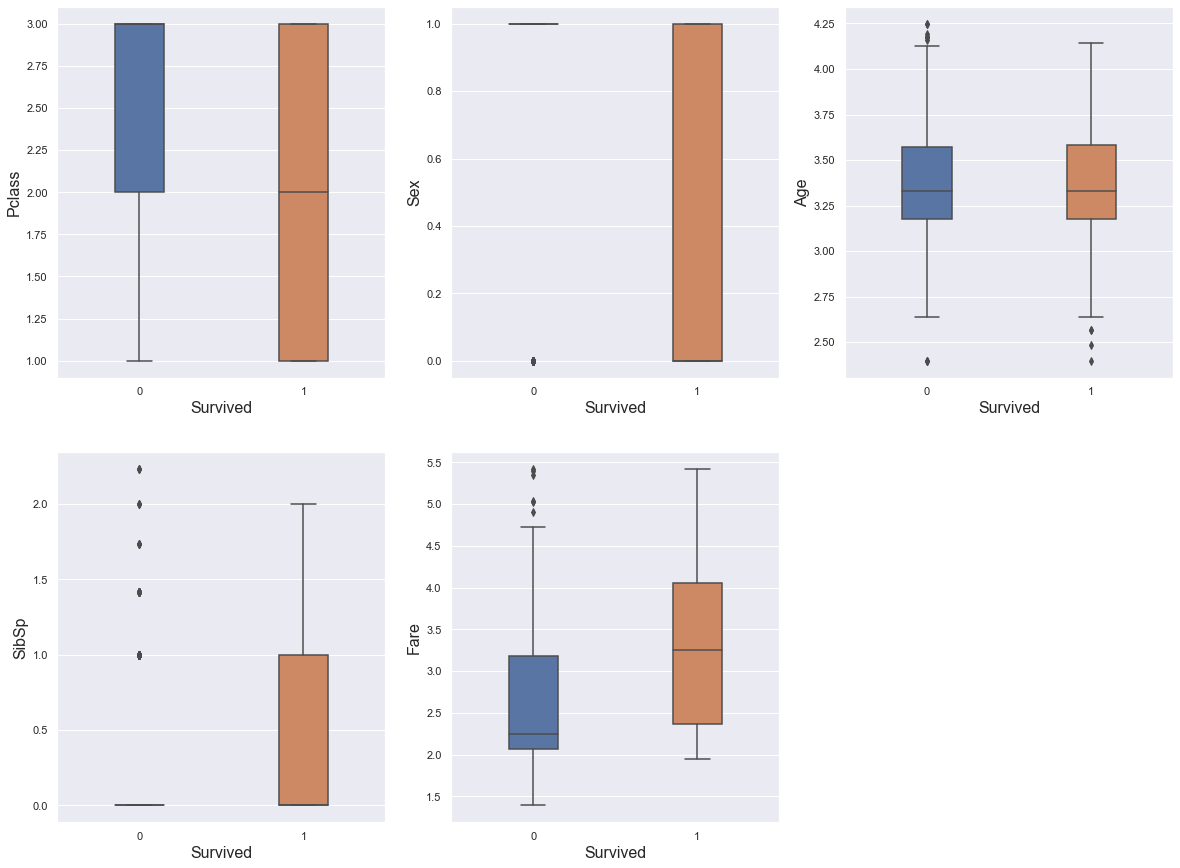

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in data_out_rem.columns[1:]:
    ax = plt.subplot(2, 3, plotnumber)
    sns.boxplot(y = data_out_rem[column], x = data_out_rem['Survived'], width = 0.3)
    plt.xlabel('Survived', fontsize = 16)
    plt.ylabel(column, fontsize = 16)
    plotnumber += 1
plt.show()

Now, let us check for multicollinearity between the independent variables. For this, we can either use the Variance Inflation Factor (VIF) or the Correlation Matrix. We will first calculate VIF.

In [17]:
scaler = StandardScaler()
variables = scaler.fit_transform(data_out_rem.drop(columns = 'Survived'))
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = data_out_rem.columns[1:]
vif

,VIF,Features
0,3.401061,Pclass
1,1.101222,Sex
2,1.140835,Age
3,1.359874,SibSp
4,3.812809,Fare


The variables have VIF below the threshold value of 5.

Hence, we proceed with model development.

In [18]:
X = data_out_rem.drop(columns = 'Survived')
y = data_out_rem['Survived']

Let us split the data into the training and testing set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

Fit a decision tree classifier.

In [20]:
dtc = DecisionTreeClassifier(random_state = 123)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

The model prediction on the test data is given as:

In [21]:
y_pred = dtc.predict(X_test)

Let us visualize the tree:

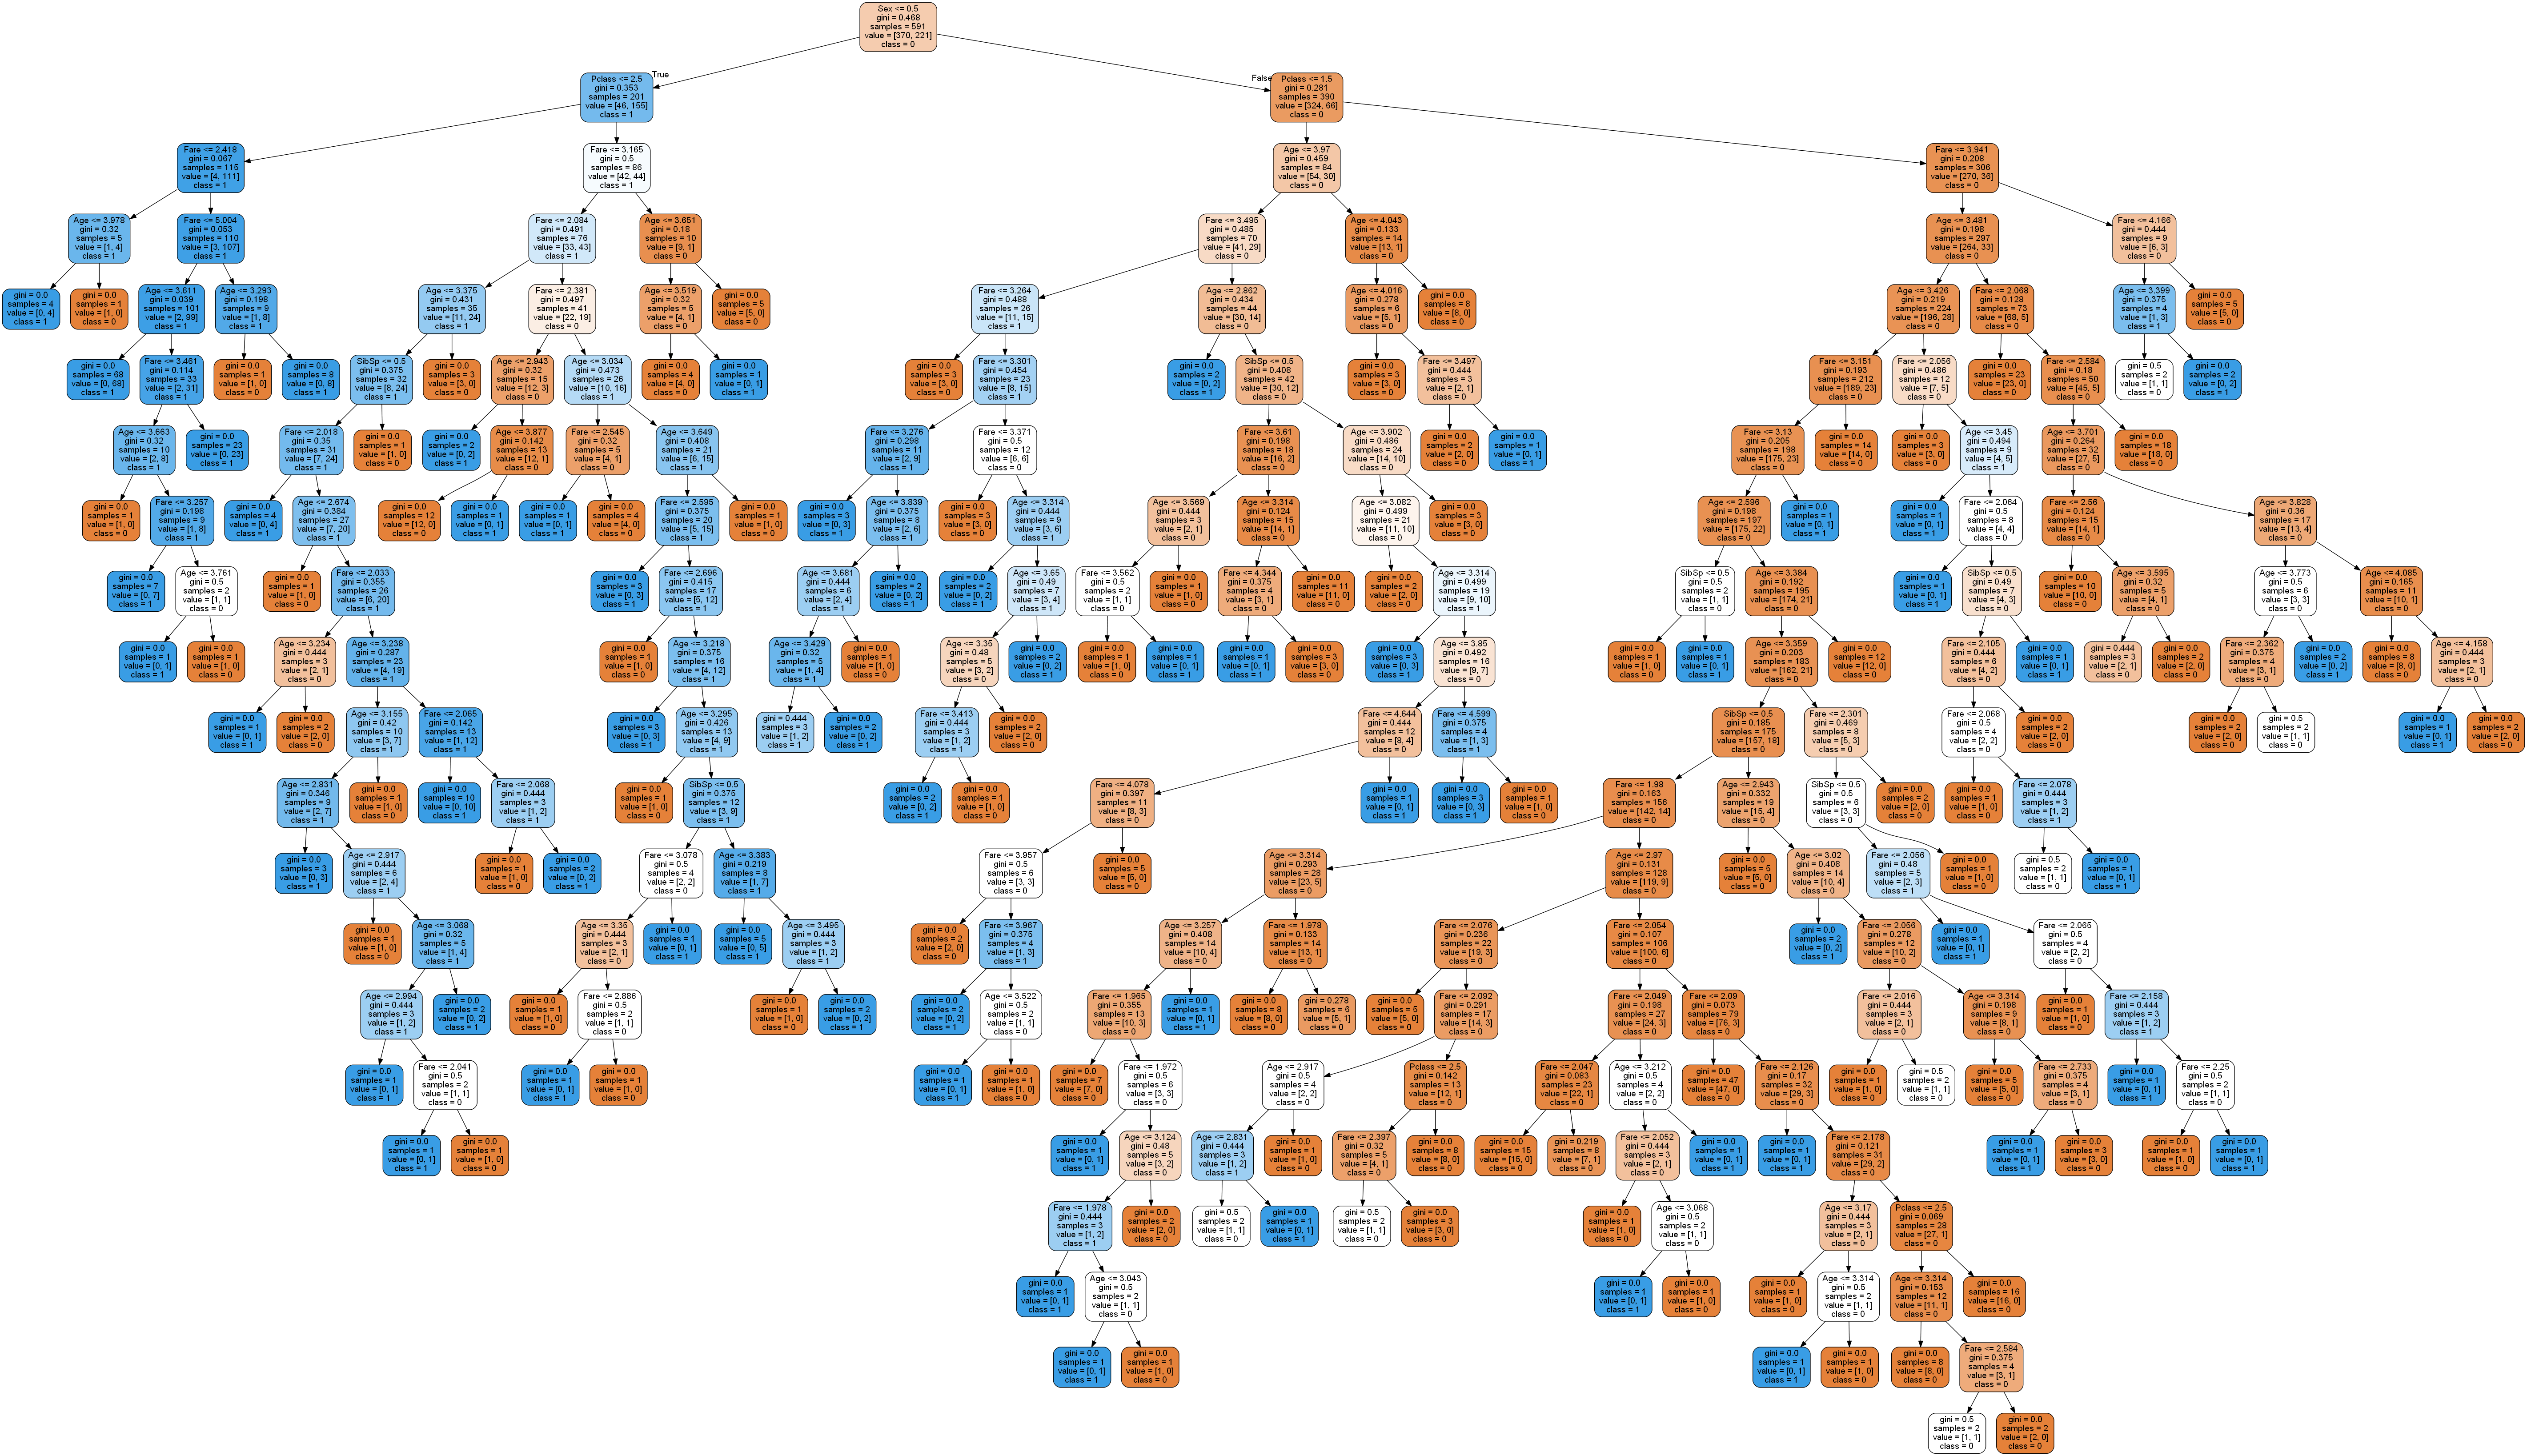

In [22]:
feature_names = X.columns
class_names = dtc.classes_.astype(str)

# Create a variable which stores the tree structure
dot_data = export_graphviz(decision_tree = dtc,
                           feature_names = feature_names,
                           class_names = class_names,
                           rounded = True,
                           filled = True)

# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("decision_tree.png")

# Show the graph
Image(graph.create_png())

We can also plot the confusion matrix as follows:

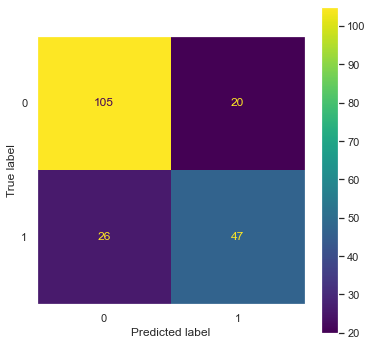

In [23]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.grid(None)
plot_confusion_matrix(dtc, X_test, y_test, ax = ax)
plt.show()

Here, we have -

1. True Negative (TN) = 105
2. False Negative (FN) = 26
3. False Positive (FP) = 20
4. True Positive (TP) = 47

With this we can calculate various evaluation metrics.

The accuracy score of the model is given below:

In [24]:
# Accuracy score = (TP + TN)/(TP + FP + FN + TN)
dtc.score(X_test, y_test)

0.7676767676767676

Similarly, we have the Precision, Recall and the F1 score as follows:

In [25]:
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.7014925373134329

In [26]:
# Recall = TP / (TP + FN)
recall_score(y_test, y_pred)

0.6438356164383562

In [27]:
# F1 score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score(y_test, y_pred)

0.6714285714285715

Now, let us try to tune some hyper-parameters using the `GridSearchCV` algorithm.

We will tune the given 5 hyper-parameters:

1. `criterion` - function to measure the quality of a split
2. `splitter` - strategy used to choose the split at each node
3. `max_depth` - maximum depth of the tree
4. `min_samples_split` - minimum number of samples required to split an internal node
5. `min_samples_leaf` - minimum number of samples required to be at a leaf node

We will use a *5-fold* cross validation. And, also fix the `random_state` for reproducibility.

In [28]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'max_depth' : range(2, 32, 1),
              'min_samples_split': range(2, 16, 1),
              'min_samples_leaf' : range(1, 16, 1),
              'random_state' : [123]}

# Define an instance
gsCV = GridSearchCV(estimator = dtc,
                    param_grid = param_grid,
                    n_jobs = -1,
                    cv = 5,
                    verbose = 1)

Fit the training data using `GridSearchCV` instance.

In [29]:
gsCV.fit(X_train, y_train)

Fitting 5 folds for each of 25200 candidates, totalling 126000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 11980 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 19180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 27980 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 38380 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 50380 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 63980 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 79180 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 95980 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 114380 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 126000 out of 126000 | elapsed:  7.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 16),
                         'min_samples_split': range(2, 16),
                         'random_state': [123],
                         'splitter': ['best', 'random']},
             verbose=1)

The parameters for the best tuned estimator are given below:

In [30]:
gsCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'random_state': 123,
 'splitter': 'random'}

Now, fit a decision tree classifier using this estimator.

In [31]:
dtc_tuned = gsCV.best_estimator_
dtc_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=12,
                       random_state=123, splitter='random')

The model prediction on the test data is given as:

In [32]:
y_pred_tuned = dtc_tuned.predict(X_test)

Let us visualize the new tree:

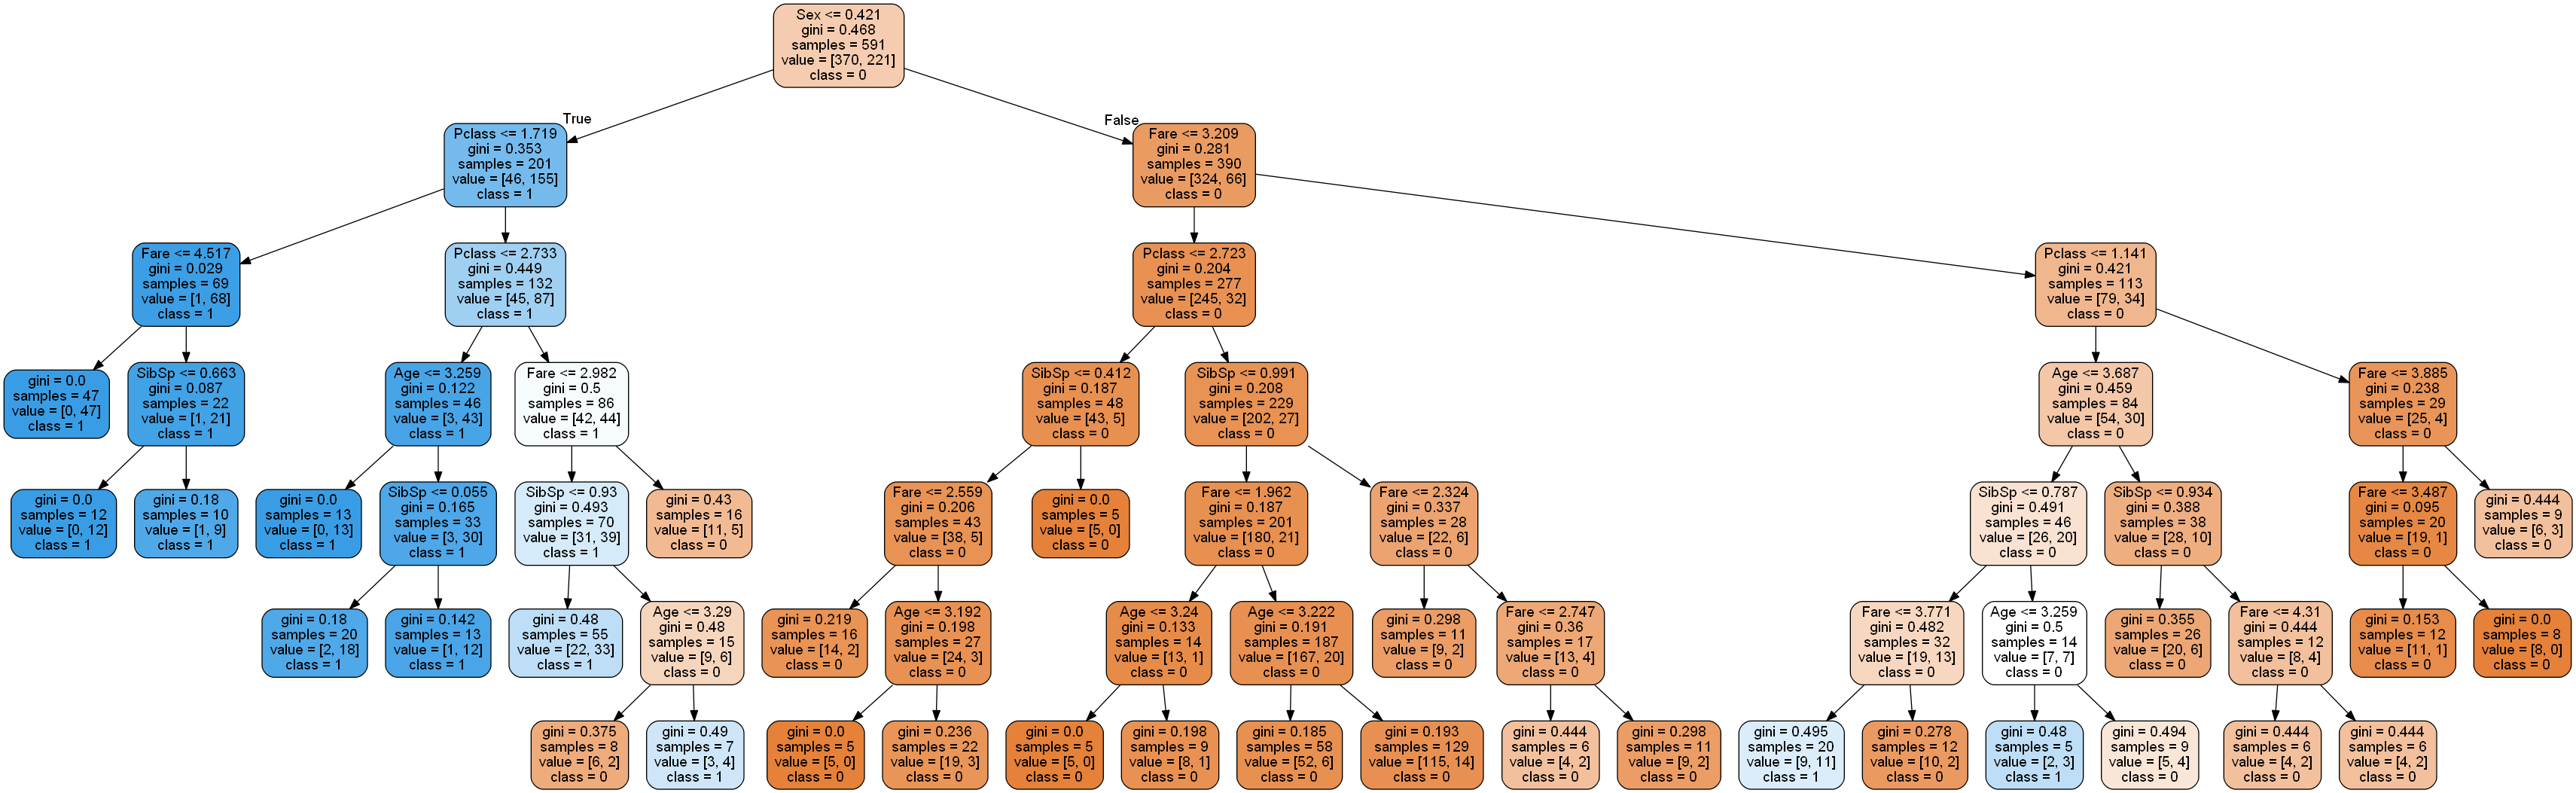

In [33]:
feature_names = X.columns
class_names = dtc_tuned.classes_.astype(str)

# Create a variable which stores the tree structure
dot_data = export_graphviz(decision_tree = dtc_tuned,
                           feature_names = feature_names,
                           class_names = class_names,
                           rounded = True,
                           filled = True)

# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("decision_tree_tuned.png")

# Show the graph
Image(graph.create_png())

Now, plot the confusion matrix as follows:

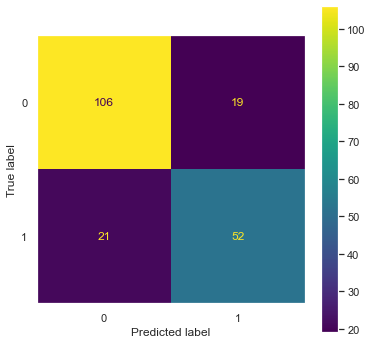

In [34]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.grid(None)
plot_confusion_matrix(dtc_tuned, X_test, y_test, ax = ax)
plt.show()

Here, we have -

1. True Negative (TN) = 106
2. False Negative (FN) = 21
3. False Positive (FP) = 19
4. True Positive (TP) = 52

This shows an improvement in the classification results.

Next, we calculate the evaluation metrics for the new model:

In [35]:
# Accuracy score = (TP + TN)/(TP + FP + FN + TN)
dtc_tuned.score(X_test, y_test)

0.797979797979798

In [36]:
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred_tuned)

0.7323943661971831

In [37]:
# Recall = TP / (TP + FN)
recall_score(y_test, y_pred_tuned)

0.7123287671232876

In [38]:
# F1 score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score(y_test, y_pred_tuned)

0.7222222222222221

Again, these metrics confirm the improvements over the previous model.

Now, we plot the *Receiver Operating Characteristic (ROC) Curve* for both the models. 

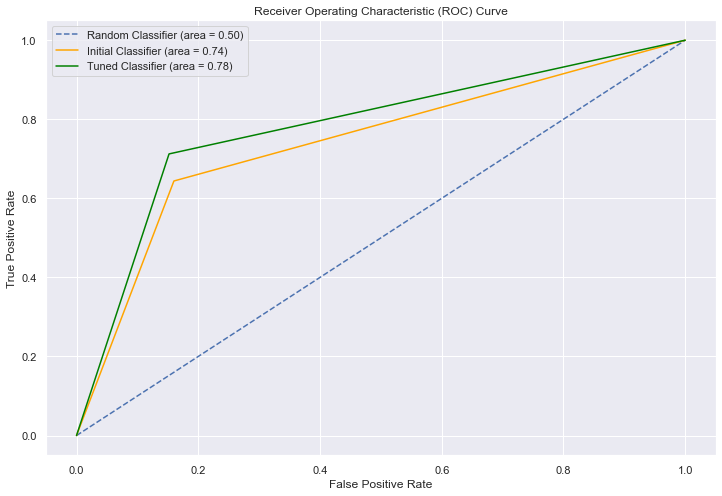

In [39]:
plt.figure(figsize = (12, 8))
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random Classifier (area = 0.50)')

# Initial classifier
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = 'Initial Classifier (area = %0.2f)' % auc)

# Tuned classifier
auc_tuned = roc_auc_score(y_test, y_pred_tuned)
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_tuned)
plt.plot(fpr_tuned, tpr_tuned, color = 'green', label = 'Tuned Classifier (area = %0.2f)' % auc_tuned)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The area under the ROC curve of the tuned classifier is greater than that of the initial classifier. Hence, the tuned classifier ensure better classification.

With this, we have successfully developed a classification model using decision trees.